# Heart Disease UCI Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.tree import plot_tree
#from graphviz import Source

#from sklearn.tree import convert_to_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


https://towardsdatascience.com/predicting-presence-of-heart-diseases-using-machine-learning-36f00f3edb2c

In [2]:
data_filled = pd.read_excel(r"/home/vildeg/Code/heart_org_missing_filled.xlsx")
data_del =pd.read_excel(r"/home/vildeg/Code/heart_org_missing_deleted.xlsx")
data_OHE = pd.read_excel(r"/home/vildeg/Code/heart_OHE_missing_filled.xlsx")

data_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                        303 non-null int64
Gender                     303 non-null int64
Chest pain type            303 non-null int64
Resting blood pressure     303 non-null int64
Cholesterol                303 non-null int64
Fasting blood sugar        303 non-null int64
Resting ECG                303 non-null int64
Maximum heart rate         303 non-null float64
Exercise enduced angina    303 non-null int64
Oldpeak(ECG)               303 non-null float64
Slope(ECG)                 303 non-null int64
Num. vessels               303 non-null float64
Thalium trace              303 non-null float64
Target                     303 non-null int64
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [3]:
#feature_names = data_OHE.names()
feature_names = list(data_OHE.columns)
feature_names.remove('Target')
target_names = 'Target'

## Correlation matrix

### Data filled in

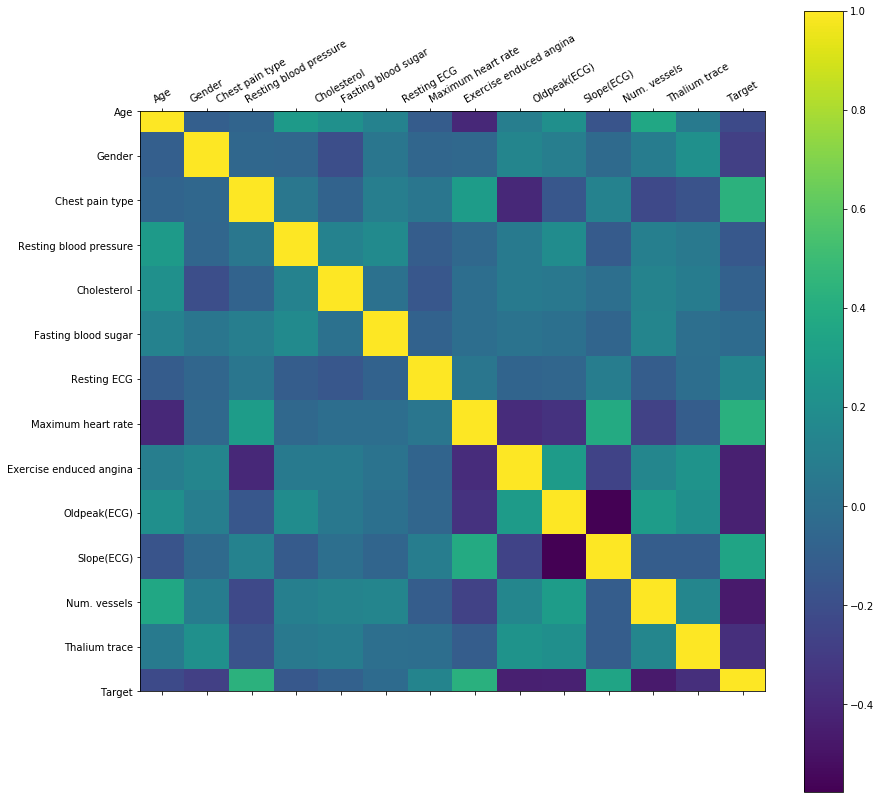

In [4]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data_filled.corr())
plt.yticks(np.arange(data_filled.shape[1]), data_filled.columns)
plt.xticks(np.arange(data_filled.shape[1]), data_filled.columns, rotation=30)
plt.colorbar()
#plt.savefig("correlation_illustration.png")

#standardScaler = StandardScaler()
#columns_to_scale = ['Age', 'Resting blood pressure', 'Cholesterol', 'Maximum heart rate', 'Oldpeak(ECG)']
#data_filled[columns_to_scale] = standardScaler.fit_transform(data_filled[columns_to_scale])

y_f = data_filled['Target']
X_f = data_filled.drop(['Target'], axis = 1)
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size = 0.2, random_state = 0)

#print(X_f_train)
feature_f_names = list(data_filled.columns)
feature_f_names.remove('Target')
target_f_names = 'Target'


### Data One Hot Encoded

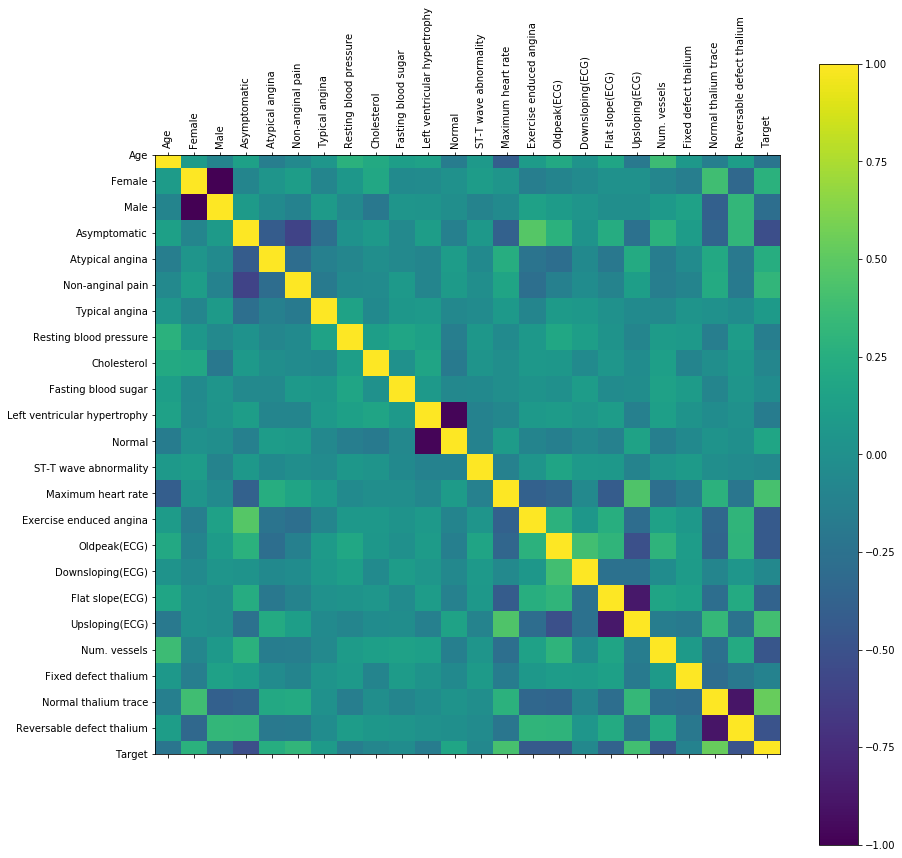

In [5]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data_OHE.corr())
plt.yticks(np.arange(data_OHE.shape[1]), data_OHE.columns)
plt.xticks(np.arange(data_OHE.shape[1]), data_OHE.columns,rotation=90)
plt.colorbar()
#plt.savefig("correlation_illustration_OHE.png")

## Scaling the data

The OHE-features does not need to be scaled, but the others must be so that they're comparable.

In [6]:
standardScaler = StandardScaler()
columns_to_scale = ['Age', 'Resting blood pressure', 'Cholesterol', 'Maximum heart rate', 'Oldpeak(ECG)']
data_OHE[columns_to_scale] = standardScaler.fit_transform(data_OHE[columns_to_scale])

## Training and test data


In [7]:
y = data_OHE['Target']
X = data_OHE.drop(['Target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


## kNN

In [8]:
knn_classifier = KNeighborsClassifier(n_neighbors = 2)
knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.7868852459016393

kNN with 2 clusters only achieved 60% accuracy, so we'll try with different numbers of clusters to see what works best.

In [9]:
scores=[]
for k in range(3,25):
    knn_classifier = KNeighborsClassifier(k)
    knn_classifier.fit(X_train, y_train)
    scores.append((knn_classifier.score(X_test, y_test)))


    

Best number of clusters=  5 , with score=  0.8688524590163934


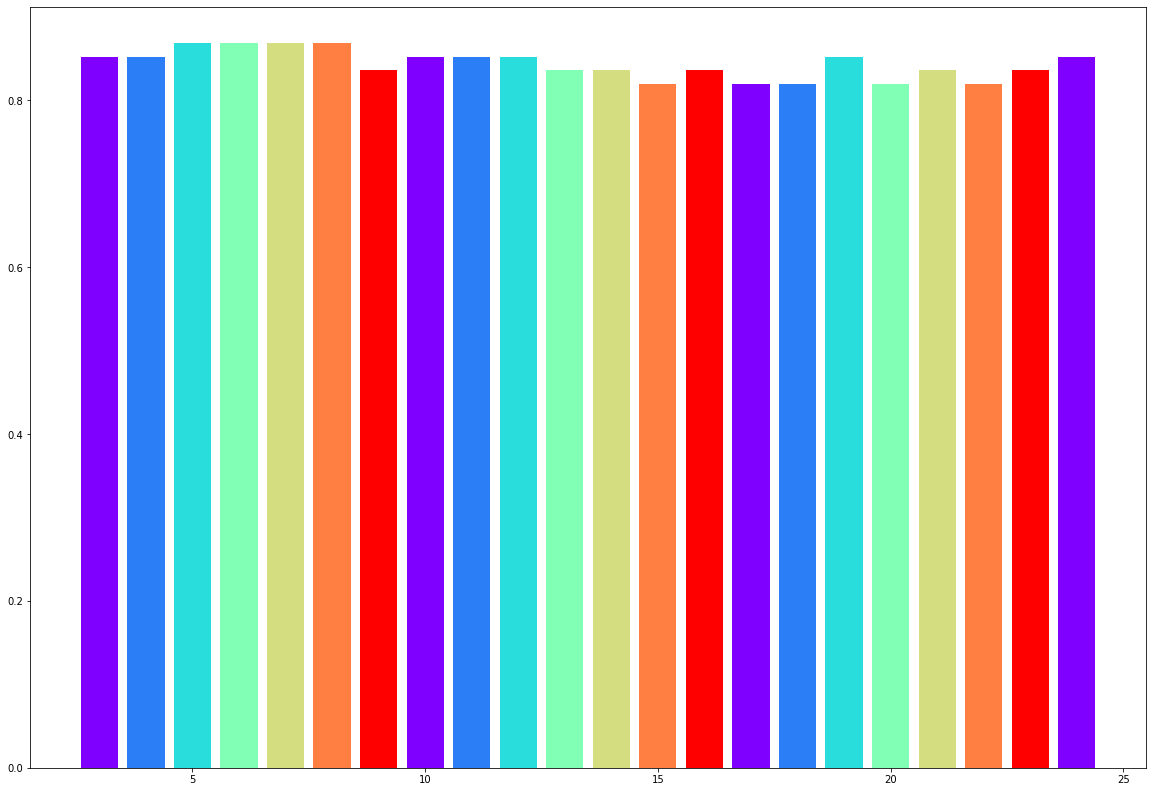

In [10]:
num_clusters = list(range(3,25))
colors = rainbow(np.linspace(0, 1, int(len(num_clusters)/3)))

plt.bar(num_clusters,scores, color = colors)
print("Best number of clusters= ",np.argmax(scores)+3, ", with score= ", scores[np.argmax(scores)])


# SVM(SVC)

In [11]:
kernels = ['linear','rbf', 'poly','sigmoid']
scores_svc =[]
for k in range(len(kernels)):
    svc_classifier= SVC(kernel=kernels[k])
    svc_classifier.fit(X_train,y_train)
    scores_svc.append(svc_classifier.score(X_test,y_test))
#plt.plot(scores_svc)
#print(scores_svc)

/home/vildeg/anaconda3/envs/AIX360/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vildeg/anaconda3/envs/AIX360/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/vildeg/anaconda3/envs/AIX360/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The linear kernel achieved 85% accuracy, the RBF-kernel achieved 57% accuracy, polynomial achieved 73, and the sigmoid achieved 55%.

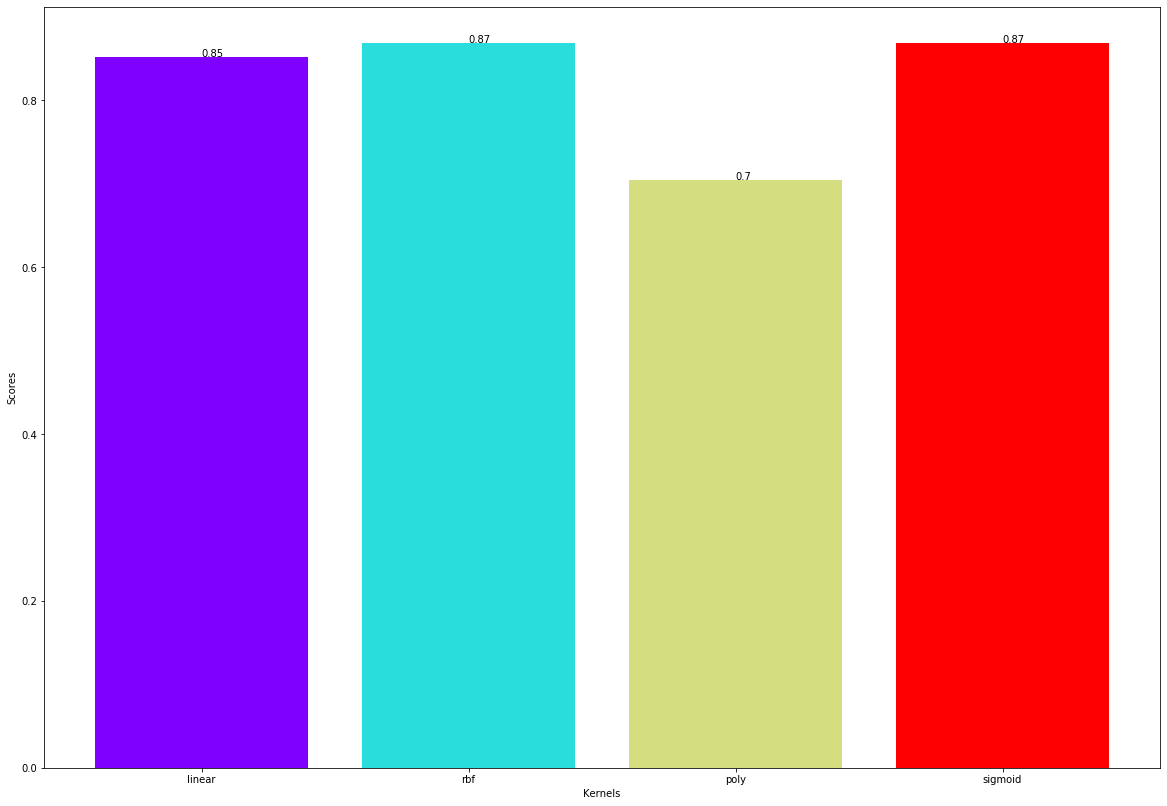

In [12]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, scores_svc, color = colors)
for i in range(len(kernels)):
    plt.text(i, scores_svc[i], round(scores_svc[i],2))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.savefig("SVC_scores.png")

### Analysis of support vectors

In [13]:
svc_classifier= SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)
score= svc_classifier.score(X_test,y_test)
print(np.shape(svc_classifier.support_vectors_))
print(svc_classifier.n_support_)

(88, 23)
[43 45]


## Decision Trees

In [14]:
dt_scores = []
for i in range(1, len(X_f.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_f_train, y_f_train)
    dt_scores.append(dt_classifier.score(X_f_test, y_f_test))


13
Index(['Age', 'Gender', 'Chest pain type', 'Resting blood pressure',
       'Cholesterol', 'Fasting blood sugar', 'Resting ECG',
       'Maximum heart rate', 'Exercise enduced angina', 'Oldpeak(ECG)',
       'Slope(ECG)', 'Num. vessels', 'Thalium trace'],
      dtype='object')


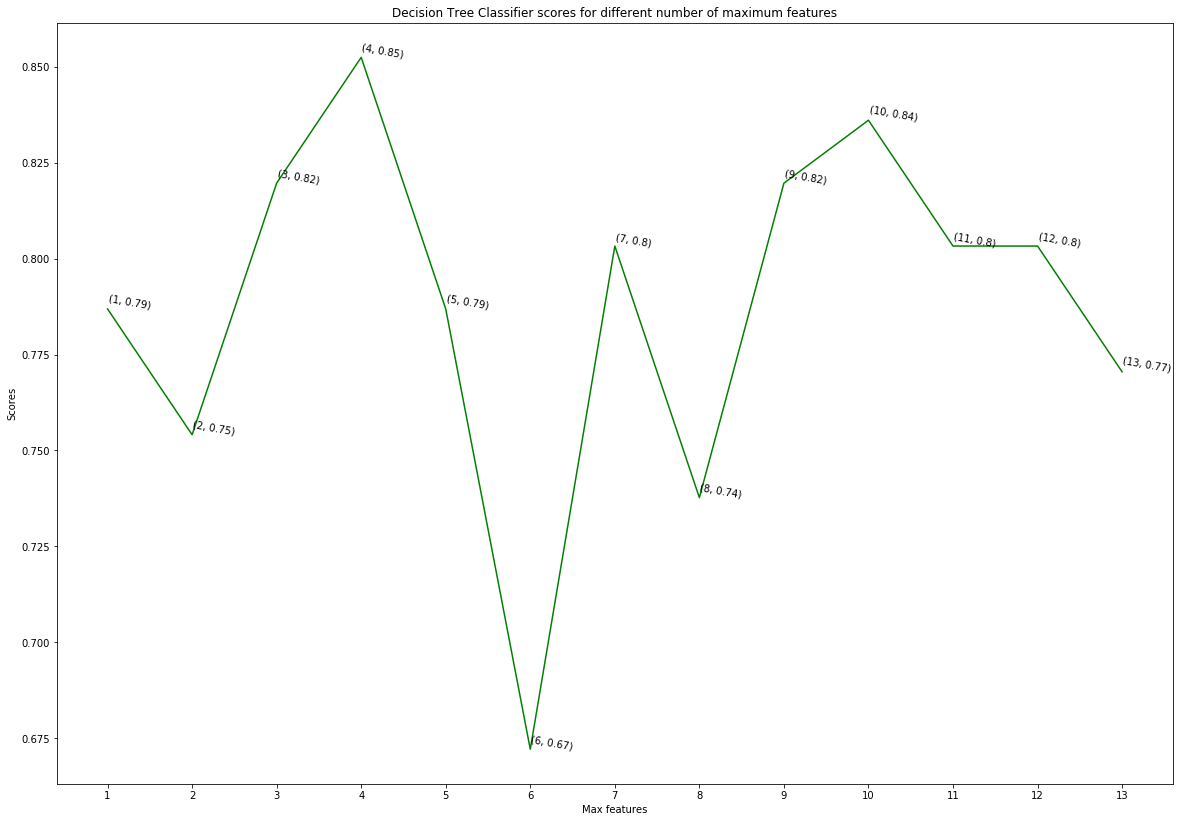

In [15]:
plt.plot([i for i in range(1, len(X_f.columns) + 1)], dt_scores, color = 'green')
print(len(X_f.columns))
for i in range(1, len(X_f.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, round(dt_scores[i-1],2)), rotation=-10)
plt.xticks([i for i in range(1, len(X_f.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
print(X_f.columns)

### Depth of tree

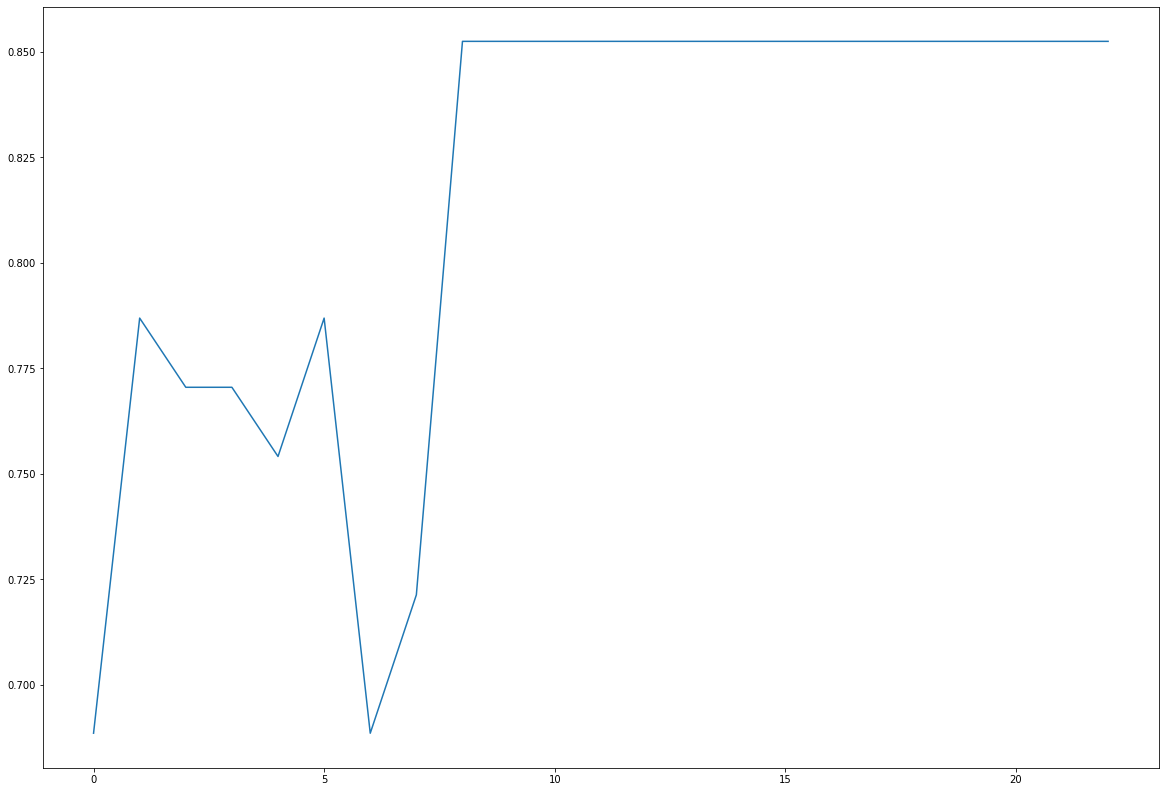

In [16]:
dt_scores = []
for d in range(2,25):
    dt_classifier = DecisionTreeClassifier(max_features = 4, max_depth = d,random_state = 0)
    dt_classifier.fit(X_f_train, y_f_train)
    dt_scores.append(dt_classifier.score(X_f_test, y_f_test))
plt.plot(dt_scores)

In [17]:
depth = np.argmax(dt_scores)
print(depth+1, " - score = ", dt_scores[depth])


9  - score =  0.8524590163934426


The highest accuracy is achieved when having 13 features to choose from at every level. But 6 and 8 also gives good results. 1 is not relevant since its results will be highly random.

#### DT 13 random features

In [18]:
dt_13f = DecisionTreeClassifier(max_features = 4, random_state = 0, max_depth = 10)
dt_13f.fit(X_f_train, y_f_train)
#print(X_f_train)
dt_13f_score =dt_classifier.score(X_f_test, y_f_test)
print(dt_13f_score)

0.8524590163934426


In [19]:

#for name, importance in zip(feature_names, dt_depth_1.feature_importances_):
    #print(name, importance)
#plt.plot(dt_depth_1.feature_importances_)

NameError: name 'dt_depth_8_score' is not defined

In [ ]:
export_graphviz(dt_13f, out_file='DT13f_vis.dot', max_depth = None,feature_names = feature_f_names, class_names = "01")
#plot_tree(dt_depth_1, feature_names= feature_names, target_names = target_names)
#print(tree)


Visualize here :
https://dreampuf.github.io/GraphvizOnline/


### Finding best depth of tree

13


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum depth')

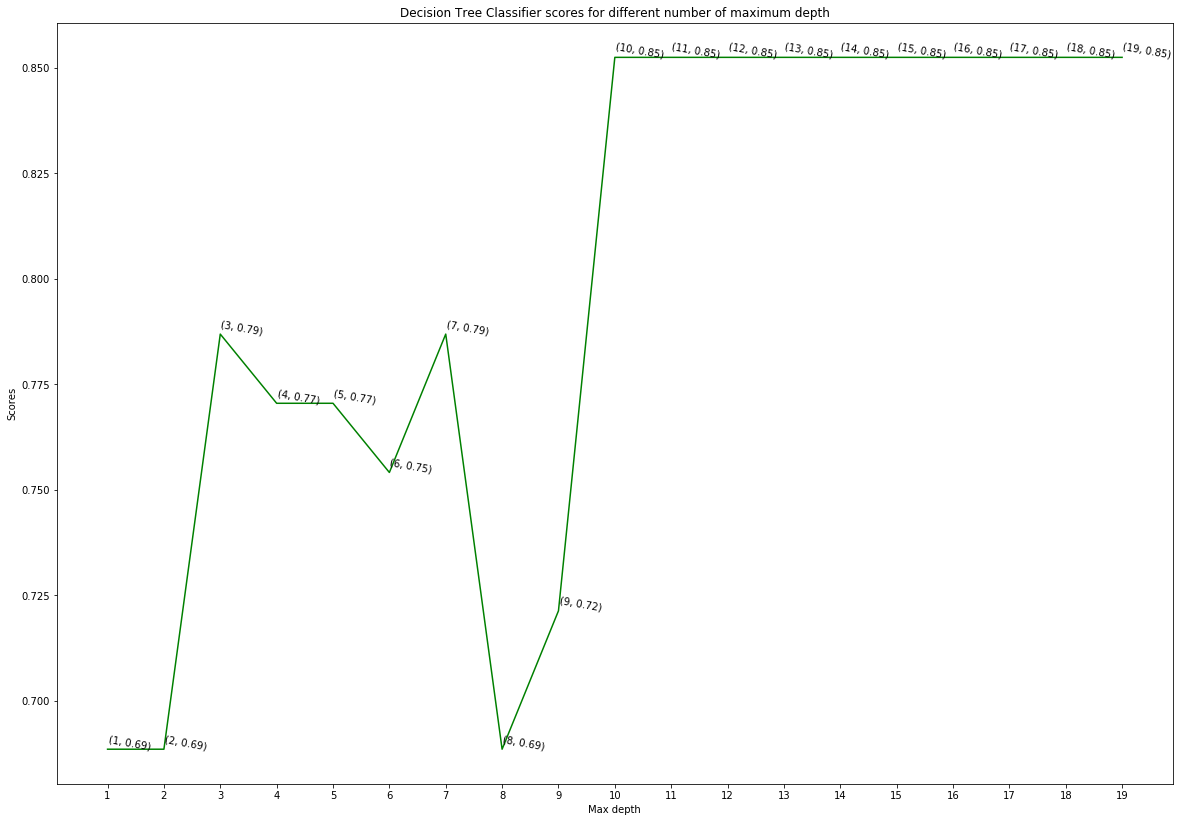

In [20]:

best_max_features = 4
dt_scores = []
max_depths = 20
for i in range(1, max_depths):
    dt_classifier = DecisionTreeClassifier(max_features = best_max_features, max_depth = i,random_state = 0)
    dt_classifier.fit(X_f_train, y_f_train)
    dt_scores.append(dt_classifier.score(X_f_test, y_f_test))


plt.plot([i for i in range(1, max_depths)], dt_scores, color = 'green')
print(len(X_f.columns))
for i in range(1, max_depths):
    plt.text(i, dt_scores[i-1], (i, round(dt_scores[i-1],2)), rotation=-10)
plt.xticks([i for i in range(1, max_depths)])
plt.xlabel('Max depth')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum depth')

## Random Forests

In [21]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

[10, 100, 200, 500, 1000]


Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

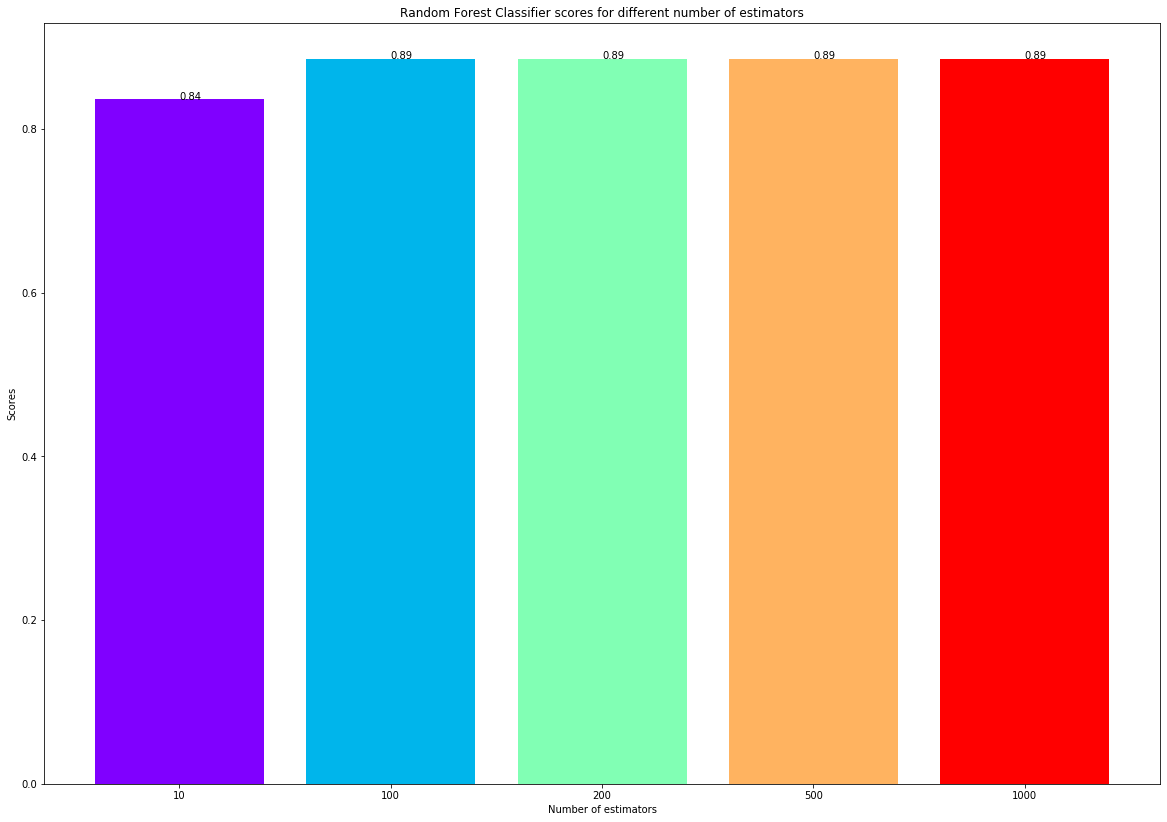

In [22]:
print(estimators)
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
ticks = []
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],2))
    ticks.append(i)
plt.xticks(ticks, estimators)
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

# Supervised learning